# Pydata Yerevan 2022 : How to use Pandas Efficiently

### Github Repository : 
### Google Colab : 

We will be using the following dataset for this tutorial :<br>
- IMDB top 1000 Movie Dataset<br>
- Bank Marketing Dataset (UCI) https://archive.ics.uci.edu/ml/datasets/bank+marketing <br>
- Bike Sharing dataset (Kaggle) https://www.kaggle.com/datasets/yasserh/bike-sharing-dataset

While you are waiting for the tutorial to start, you can go through above link to download dataset and Notebook :<br>
N.B. : If you do not have Python installed on your system, you can use Google Colab to run the notebook.


### Why pandas? 
-  easy to use 
-  easy to learn.
- it is fast 
- it is a powerful data analysis toolkit
- it is open source
- it is supported by many developers (~3k)


### PART 1 :Pandas Big Picture



<img src="img/Excel_Vs_Pandas.jpg" width="550" height="200" style ="float:center" >

### Two building blocks of pandas are Series and DataFrame
- Series: A 1D labeled data structure with rows.
- DataFrame: A 2D labeled data structure with columns and rows.


In [1]:
#import required libraries
import pandas as pd
import numpy as np

In [4]:
# read top 1000 movies imdb dataset
imdb = pd.read_csv('data/imdb_1000.csv')
imdb.head(10)



,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']"
1,9.2,The Godfather,R,Crime,175,"['Marlon Brando', 'Al Pacino', 'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"['Al Pacino', 'Robert De Niro', 'Robert Duvall']"
3,9.0,The Dark Knight,PG-13,Action,152,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
4,8.9,Pulp Fiction,R,Crime,154,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']"
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"['Clint Eastwood', 'Eli Wallach', 'Lee Van Cle..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell..."
8,8.9,Schindler's List,R,Biography,195,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley']"
9,8.9,Fight Club,R,Drama,139,"['Brad Pitt', 'Edward Norton', 'Helena Bonham ..."


In [32]:
# check the type of the dataset
type(imdb)


pandas.core.frame.DataFrame

In [33]:
# check the type of a column
type(imdb.title)


pandas.core.series.Series

### some of the basic operation by Pandas


In [35]:
# print some basic information about the dataset
print(imdb.duration.mean())
print(imdb.duration.max())
print(imdb.duration.min())

120.97957099080695
242
64


### Notes:
#### 1- Ask Questions and Answer them with Data by Pandas insetad of Jumping to the analysis without knowing the data  <br>
#### 2- Relation does not mean causation. Here we just find the relationship is present in the data.(Causation needs more domain knowledge)  <br>
#### 3- There more than one way to do something in Pandas. <br>
#### 4- Data is not always clean. We need to clean it before analysis. <br>
Q1 : Which Genre had the highest number of movies among top 1000 movies dataset? <br>
Q2 : What is the distribution of Duration (In every 10 minutes) in the top 1000 movies? <br>
Q3 : Which Content_rating(R,PG-13,..) has the highest number of movies in the top 1000 movies? <br>
Q4 : what is the average duration of each genre?    <br>
Q5 : what is the average duration of each genre and content rating and star rating? <br>


#### Practice 1:
How many of movies got rating between 7.5 and 8.5? (Hint:use value_counts() method) <br>

In [38]:
# Q1 : Which Genre had the highest number of movies among top 1000 movies dataset? <br>
imdb.genre.value_counts(normalize=True)*100


Drama        28.396323
Comedy       15.934627
Action       13.891726
Crime        12.665986
Biography     7.865169
Adventure     7.660878
Animation     6.332993
Horror        2.962206
Mystery       1.634321
Western       0.919305
Sci-Fi        0.510725
Thriller      0.510725
Film-Noir     0.306435
Family        0.204290
History       0.102145
Fantasy       0.102145
Name: genre, dtype: float64

In [39]:
# What is the distribution of Duration (In every 10 minutes) in the top 1000 movies?
# way 1:
bins = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]
labels = ['60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160','160-170','170-180','180-190','190-200','200-210','210-220','220-230','230-240','240-250']
imdb['duration_group'] = pd.cut(imdb.duration,labels=labels,bins=bins)
imdb.head()


,star_rating,title,content_rating,genre,duration,actors_list,duration_group
0,9.3,The Shawshank Redemption,R,Crime,142,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",140-150
1,9.2,The Godfather,R,Crime,175,"['Marlon Brando', 'Al Pacino', 'James Caan']",170-180
2,9.1,The Godfather: Part II,R,Crime,200,"['Al Pacino', 'Robert De Niro', 'Robert Duvall']",190-200
3,9.0,The Dark Knight,PG-13,Action,152,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",150-160
4,8.9,Pulp Fiction,R,Crime,154,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",150-160


In [43]:
# way 2: using math function
imdb['duration_group_2'] = imdb.duration // 10 
imdb.duration_group.value_counts()


110-120    169
100-110    164
120-130    159
90-100     131
130-140     97
80-90       59
140-150     56
150-160     43
160-170     32
170-180     17
70-80       13
180-190     13
190-200      8
60-70        7
200-210      4
210-220      3
220-230      2
230-240      1
240-250      1
Name: duration_group, dtype: int64

In [44]:
# Q3 : Which Content_rating(R,PG-13,..) has the highest number of movies in the top 1000 movies? <br>
imdb.content_rating.value_counts()


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [10]:
# Replace Unrated with Not Rated
#Way 1:
imdb.content_rating.replace('UNRATED','NOT RATED',inplace=True)

#Way 2:
imdb.content_rating = imdb.content_rating.replace('UNRATED','NOT RATED')

#ways 3:
imdb.content_rating = imdb.content_rating.apply(lambda x:'UNRATED' if x =='NOT RATED' else x)

# Way 4:
imdb.content_rating = imdb.content_rating.map({'UNRATED' ,'NOT RATED'})

In [11]:
# what is the average duration of each genre?
imdb.groupby('genre').duration.mean().sort_values(ascending= False)


genre
Western      136.666667
Adventure    134.840000
Biography    131.844156
Drama        126.539568
Action       126.485294
Crime        122.298387
Mystery      115.625000
Thriller     114.200000
Fantasy      112.000000
Sci-Fi       109.000000
Comedy       107.602564
Family       107.500000
Horror       102.517241
Film-Noir     97.333333
Animation     96.596774
History       66.000000
Name: duration, dtype: float64

In [12]:
# what is the average duration of each genre and content rating?
imdb.groupby(['genre','content_rating']).duration.mean().sort_values(ascending= False)




genre      content_rating
Action     G                 178.000000
Western    PG-13             175.000000
Biography  GP                172.000000
Drama      PASSED            172.000000
           G                 170.666667
                                ...    
Comedy     X                  84.000000
           PASSED             83.666667
Horror     APPROVED           82.500000
           NOT RATED          75.000000
History    UNRATED            66.000000
Name: duration, Length: 95, dtype: float64

In [14]:
# what is the average duration of each genre and content rating and maximum of star rating?
imdb.groupby(['genre','content_rating']).agg({'duration':'mean','star_rating':'max'})


duration  star_rating
genre   content_rating                         
Action  APPROVED        143.333333          7.8
        G               178.000000          7.8
        GP              144.000000          7.7
        NOT RATED       129.500000          8.3
        PASSED           98.000000          7.7
...                            ...          ...
Western APPROVED        132.000000          8.3
        NOT RATED       151.000000          8.9
        PG              110.000000          8.1
        PG-13           175.000000          8.6
        R               133.666667          8.5

[95 rows x 2 columns]

In [16]:
# what is the average duration of each genre and content rating and star rating with Pivot table?
imdb.pivot_table(index=['genre','content_rating'],values=['duration','star_rating'],aggfunc={'duration':'mean','star_rating':'max'})


duration  star_rating
genre   content_rating                         
Action  APPROVED        143.333333          7.8
        G               178.000000          7.8
        GP              144.000000          7.7
        NOT RATED       129.500000          8.3
        PASSED           98.000000          7.7
...                            ...          ...
Western APPROVED        132.000000          8.3
        NOT RATED       151.000000          8.9
        PG              110.000000          8.1
        PG-13           175.000000          8.6
        R               133.666667          8.5

[95 rows x 2 columns]

In [15]:
# Practice: How many actors are in the top 1000 movies? 



### Part II : How to use Pandas More effiently

### 95% of people use this kind of code style but only 5% of people know how to use it more efficiently.!

<img src="img/Screenshot1.jpg" width="750" height="500" style ="float:middle" ><br>
<br>
<img src="img/Screenshot2.jpg" width="750" height="500" style ="float:left" >


### Use chaining and Assign instead of classic coding

nput variables:<br>
**bank client data:**<br>
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

**related with the last contact of the current campaign:**<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**   <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

**social and economic context attributes**<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

**Output variable (desired target):**<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

# Again Ask Questions and Answer them with Data by Pandas
Q1 : What is the distribution of age(in every decade in data set? <br>
Q2 : Is there relation between age group and balance? <br>
Q3 : Is there relation between marital status and balance? <br>
Q4 : Is there relation between education and balance? <br>
Q5 : Is there relation between occupation and balance? <br>
Q6 : Which job had more default? <br>
Q7 : Which education level had more balance? <br>



In [3]:
# read bank dataset
bank = pd.read_csv('data/bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
# clean dataset
def clean_df(df_):
    return (df_
    .replace({'unknown':np.nan,'y':1,'no':0,'yes':1,'no':0})
    )
bank = clean_df(bank)
bank.head()
# Print % of null values in each column
bank.isnull().sum() *100 / bank.shape[0]

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

In [33]:
bank.dtypes

age             int64
job          category
marital        object
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
y               int64
dtype: object

In [4]:
# clean the dataset by dropping the null values and replace them with the mode value of the column
def clean_df(df_):
    return (df_
    .replace({'unknown':np.nan,'y':1,'no':0,'yes':1,'no':0})
    .assign(job=lambda x:x.job.fillna(x.job.mode()[0]).astype('category')
    ,education=lambda x:x.education.fillna(x.job.mode()[0]).astype('category')
    ,contact = lambda x:x.contact.fillna(x.job.mode()[0]).astype('category')
    )
    # .drop('poutcome',axis=1)
    )
bank = clean_df(bank)
bank.head()
# Print % of null values in each column
bank.isnull().sum() *100 / bank.shape[0]

age           0.000000
job           0.000000
marital       0.000000
education     0.000000
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

In [36]:
bins=[0,20,30,40,50,60,70,80,90,100]
labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

<AxesSubplot:xlabel='education'>

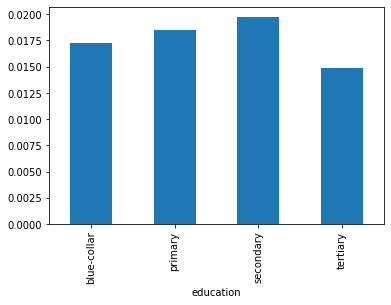

In [47]:
# Create new column for age group and answer the following questions:
(bank
.assign(age_group = pd.cut(bank.age,labels=labels,bins=bins))

# Q1 : What is the distribution of age(in every decade in data set? <br>
# .age_group.value_counts().sort_index().plot(kind='bar')

# Q2 : What is the relation between age group and balance? <br>
# .groupby('age_group').balance.mean().plot(kind='bar')

#Q3 : What is the relation between marital status and balance? <br>
# .groupby('marital').balance.mean().plot(kind='bar')



# Q4 : What is the relation between education and balance? <br>
# .groupby('education').balance.mean().plot(kind='bar')



# Q5 : What is the relation between job and balance? <br>
# .groupby('job').balance.mean().plot(kind='bar')


# Q6 :  Which job had more default? <br>
# .groupby('job').default.mean().plot(kind='bar')


# Q7 : Which education level had more default? <br>
.groupby('education').default.mean().plot(kind='bar')

)


### USE QUERY INSIDE PANDAS
When you have multiple conditions, you can use query() method to make your code more readable. <br>

### Q1: select rows  with balance between 10000 and 20000

In [8]:
# Q1: select rows  with balance between 10000 and 20000
bank.query('balance >  10000 and balance < 20000')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,0,10635,1,0,blue-collar,5,may,336,1,-1,0,NaN,0
69,35,blue-collar,single,secondary,0,12223,1,1,blue-collar,5,may,177,1,-1,0,NaN,0
1236,34,entrepreneur,married,tertiary,0,10350,1,0,blue-collar,8,may,187,3,-1,0,NaN,0
2065,55,retired,married,secondary,0,18722,1,0,blue-collar,12,may,128,2,-1,0,NaN,0
2479,59,management,divorced,primary,0,13308,1,0,blue-collar,13,may,131,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45075,28,technician,single,tertiary,0,11862,0,0,cellular,21,oct,549,2,238,13,other,1
45097,61,self-employed,married,tertiary,0,10861,0,0,cellular,25,oct,225,1,91,5,success,1
45098,44,technician,single,blue-collar,0,11115,0,0,cellular,25,oct,189,1,185,4,success,0
45118,78,retired,married,primary,0,14204,0,0,cellular,26,oct,150,1,183,1,other,0


In [12]:
# Select rows with balance between 10000 and 20000 and age between 30 and 40 and job is admin or management
bank.query('balance >  10000 and balance < 20000 and job in ("admin.","management")')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,0,10635,1,0,blue-collar,5,may,336,1,-1,0,NaN,0
2479,59,management,divorced,primary,0,13308,1,0,blue-collar,13,may,131,1,-1,0,NaN,0
2618,49,management,married,tertiary,0,12482,1,1,blue-collar,13,may,46,3,-1,0,NaN,0
3486,47,management,divorced,tertiary,0,10399,1,0,blue-collar,15,may,59,2,-1,0,NaN,0
3500,29,management,married,tertiary,0,10576,0,0,blue-collar,15,may,1224,2,-1,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44438,53,management,married,tertiary,0,18931,0,0,cellular,5,aug,224,1,86,23,other,0
44678,60,admin.,married,secondary,0,12980,0,0,cellular,3,sep,177,2,182,1,success,0
44709,38,management,married,tertiary,0,14352,0,0,blue-collar,6,sep,8,1,-1,0,NaN,0
44787,30,management,single,tertiary,0,13774,0,0,cellular,14,sep,380,1,-1,0,NaN,0


In [13]:
## Parctice: Select rows with age between 30 and 40 and job is admin or management and had default
bank.query('age >  30 and age < 40 and job in ("admin.","management") and default ==1 ')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
884,37,management,single,tertiary,1,45,1,0,blue-collar,7,may,204,1,-1,0,NaN,0
1418,33,management,married,secondary,1,879,1,0,blue-collar,8,may,245,1,-1,0,NaN,0
1589,35,management,married,tertiary,1,89,0,1,blue-collar,8,may,166,3,-1,0,NaN,0
2241,32,admin.,divorced,secondary,1,-18,1,0,blue-collar,12,may,155,3,-1,0,NaN,0
2375,32,management,single,tertiary,1,-3,1,0,blue-collar,13,may,500,2,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35086,32,admin.,married,secondary,1,-166,1,0,cellular,6,may,129,3,-1,0,NaN,0
35440,37,management,divorced,tertiary,1,-1,1,1,cellular,7,may,101,1,349,1,failure,0
35531,32,management,divorced,tertiary,1,-277,1,0,cellular,7,may,196,3,-1,0,NaN,0
38726,35,management,married,tertiary,1,-10,1,0,cellular,15,may,168,2,364,1,other,0


#### Simplify Join in Pandas

<img src='img/SQL_JOINS_V2.png'>

#### Concat
#### Merge
#### Join

In [14]:
# read Bike Sharing Dataset
Bike = pd.read_csv('data/Bike_demand.csv')
Bike.head()


,dteday,registered,cnt
0,01-01-2018,654,985
1,02-01-2018,670,801
2,03-01-2018,1229,1349
3,04-01-2018,1454,1562
4,05-01-2018,1518,1600


In [15]:
# read Calendar Dataset
calendar = pd.read_csv('data/Calendar_data.csv')
calendar.head()


,dteday,season,yr,mnth,holiday,weekday,workingday
0,01-01-2018,1,0,1,0,6,0
1,02-01-2018,1,0,1,0,0,0
2,03-01-2018,1,0,1,0,1,1
3,04-01-2018,1,0,1,0,2,1
4,05-01-2018,1,0,1,0,3,1


In [16]:
# read Weather Dataset
weather = pd.read_csv('data/weather_data.csv')
weather.head()


,dteday,weathersit,temp,atemp,hum,windspeed
0,01-01-2018,2,14.110847,18.18125,80.5833,10.749882
1,02-01-2018,2,14.902598,17.68695,69.6087,16.652113
2,03-01-2018,1,8.050924,9.47025,43.7273,16.636703
3,04-01-2018,1,8.200000,10.60610,59.0435,10.739832
4,05-01-2018,1,9.305237,11.46350,43.6957,12.522300


### use Merge to combine two dataframes Then: <br>

Answer the following questions: <br>
Q1 : What is the trend of bike demand over years? <br>
Q2 : Which month(in the whole dataset) had the highest demand for Bikes? <br>
Practice 2 : Is there any relation between temprature and Bike demand? <br>
Practice 3 : Does Holiday affect demand or not? <br>
Practice 4 : Does weathersit affect demand or not? <br>

<AxesSubplot:xlabel='weathersit'>

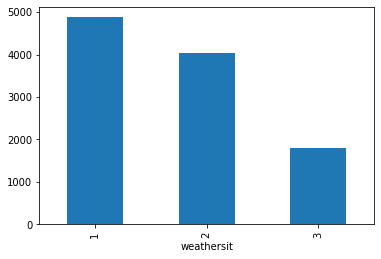

In [46]:
# Merge Bike_demand and Calendar_date and Weather_data on date
(Bike
.merge(calendar,on='dteday')
.merge(weather,on='dteday')
.assign(date= lambda x:pd.to_datetime(x.dteday,format='%d-%m-%Y')
,year_month = lambda x:x.date.dt.to_period('M')
)
# .dtypes
# Q1 : What is the trend of bike demand over years? 
# .plot(x='date',y='cnt',figsize=(20,7))


#Q1 : Which month had the highest demand for Bikes? <br>
# .groupby('year_month').cnt.sum().plot()

# Practice 2 : Is there any relation between temprature and Bike demand? <br>
# .plot(x='temp',y='cnt',kind='scatter')

# Practice 3 : Does Holiday affect demand or not <br>
# .groupby('holiday').cnt.mean().plot(kind='bar')

# Practice 4 : Does weathersit affect demand or not? <br>
# .groupby('weathersit').cnt.mean().plot(kind='bar')

)

### Use concat to combine two dataframes

In [50]:
# Create new dataframe for 2018 data
Bike_2018 = (Bike
.merge(calendar,on='dteday')
.merge(weather,on='dteday')
.assign(date= lambda x:pd.to_datetime(x.dteday,format='%d-%m-%Y'))
.query('date.dt.year==2018')
)
Bike_2018



,dteday,registered,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,date
0,01-01-2018,654,985,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,2018-01-01
1,02-01-2018,670,801,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,2018-01-02
2,03-01-2018,1229,1349,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,2018-01-03
3,04-01-2018,1454,1562,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,2018-01-04
4,05-01-2018,1518,1600,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27-12-2018,1059,1162,1,0,12,0,2,1,2,13.325000,16.38165,76.2500,12.626150,2018-12-27
361,28-12-2018,2047,2302,1,0,12,0,3,1,1,12.264330,13.99870,50.3913,19.695387,2018-12-28
362,29-12-2018,2169,2423,1,0,12,0,4,1,1,10.181653,13.19460,57.4167,8.000604,2018-12-29
363,30-12-2018,2508,2999,1,0,12,0,5,1,1,12.778347,15.94060,63.6667,9.000579,2018-12-30


In [51]:
# Create new dataframe for 2019 data
Bike_2019 = (Bike
.merge(calendar,on='dteday')
.merge(weather,on='dteday')
.assign(date= lambda x:pd.to_datetime(x.dteday,format='%d-%m-%Y'))
.query('date.dt.year==2019')
)
Bike_2019

,dteday,registered,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,date
365,01-01-2019,1608,2294,1,1,1,0,0,0,1,15.170000,18.78105,69.2500,12.875189,2019-01-01
366,02-01-2019,1707,1951,1,1,1,1,1,0,1,11.194763,12.61520,38.1304,22.087555,2019-01-02
367,03-01-2019,2147,2236,1,1,1,0,2,1,1,6.150000,6.31375,44.1250,24.499957,2019-01-03
368,04-01-2019,2273,2368,1,1,1,0,3,1,2,4.407500,5.96685,41.4583,12.374900,2019-01-04
369,05-01-2019,3132,3272,1,1,1,0,4,1,1,10.899153,13.92060,52.4167,8.709129,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1867,2114,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2019-12-27
726,28-12-2019,2451,3095,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,2019-12-28
727,29-12-2019,1182,1341,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,2019-12-29
728,30-12-2019,1432,1796,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,2019-12-30


In [54]:
# Concat 2018 and 2019 data into one dataframe
Bike_total = pd.concat([Bike_2018,Bike_2019],axis=0)
Bike_total


,dteday,registered,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,date
0,01-01-2018,654,985,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,2018-01-01
1,02-01-2018,670,801,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,2018-01-02
2,03-01-2018,1229,1349,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,2018-01-03
3,04-01-2018,1454,1562,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,2018-01-04
4,05-01-2018,1518,1600,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1867,2114,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2019-12-27
726,28-12-2019,2451,3095,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,2019-12-28
727,29-12-2019,1182,1341,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,2019-12-29
728,30-12-2019,1432,1796,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,2019-12-30


### Other useful methods
